In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scapy import *
from sources import *
import seaborn as sns
sns.set(style="whitegrid")

In [66]:
data_path = '../data/network_1/captures2.pcap'
sniffed_packets = sniff(offline=data_path)


* Lugar: red de oficina
* Horario: 16:27 - 16:43
* Duración: 16 minutos
* Tecnologia WI-FI
* Herramienta de captura: wireshark
* Paquetes capturados: 26085




# Modelado y Analisis de la Informcion por Simbolo para la Fuente S1

**Modelo**

Sean $ p_1, .., p_n $ las tramas de capa 2 que se capturan en una red local. Se pueden modelar las tramas capturadas como una fuente de información de memoria nula $ S_1 = \{ s_1 , s_2 , ..., s_q \} $, donde cada si está formado por la combinación entre el tipo de destino de la trama (unicast o broadcast) y el protocolo de la capa inmediata superior encapsulado en la misma. 
    
    


In [67]:
S1 = create_S1_source(sniffed_packets)

### Información por simbolo y Entropia de la Fuente

In [68]:
def entropy(source):
    """Devuelve entropía de 'source' (float)."""
    infos = informacion_por_simbolo(source)
    probas = proba_por_simbolo(source)
    # Esto funciona porque los símbolos en infos y probas están en el mismo orden
    return sum(np.array(list(infos.values())) * np.array(list(probas.values())))


In [8]:
def entropy(source):
    """Devuelve entropía de 'source' (float)."""
    infos = informacion_por_simbolo(source)
    probas = proba_por_simbolo(source)
    # Esto funciona porque los símbolos en infos y probas están en el mismo orden
    return sum(np.array(list(infos.values())) * np.array(list(probas.values())))

def grafico_info_por_simbolo_s1(source):
    entropia = entropy(source)
    entropia_maxima = max_entropy(source)
    fig, ax = plt.subplots(figsize=(8, 4))
    bar_width = 0.35
    informacion = informacion_por_simbolo(source)
    bar_width = 0.35
    index, values = map(list, zip(*informacion.items()))
    ax.bar(index, values, bar_width, color='b')
    ax.set_xlabel('Símbolo')
    ax.set_ylabel('Información en bits')
    ax.set_title('Información para cada Símbolo de S1')
    ax.plot(range(6), [entropia]*6, color='k', label='Entropía')
    ax.plot(range(6), [entropia_maxima]*6, color='r', label='Entropía máxima')
    ax.legend(loc="upper right")
    fig.tight_layout()
    plt.show()

# Red A

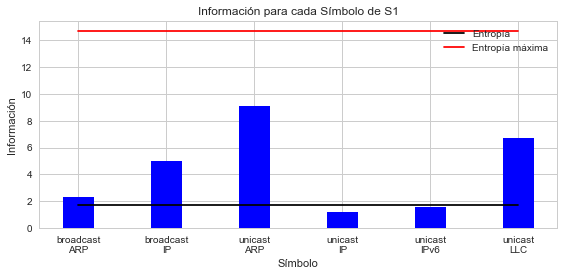

In [22]:
data_path = '../data/network_1/captures2.pcap'
sniffed_packets_a = sniff(offline=data_path)
S1_a = create_S1_source(sniffed_packets_a)
grafico_info_por_simbolo_s1(S1_a)

In [23]:
print('Entropia: {}'.format(entropy(S1_a)))
print('Entropia maxima: {}'.format(max_entropy(S1_a)))
informacion_por_simbolo(S1_a)

Entropia: 1.749323144285812
Entropia maxima: 14.670932812915106


{'broadcast\nARP': 2.3487229691662117,
 'broadcast\nIP': 5.009154715143119,
 'unicast\nARP': 9.056222968799899,
 'unicast\nIP': 1.2269532703138528,
 'unicast\nIPv6': 1.5813168186870012,
 'unicast\nLLC': 6.74019547535222}

Observaciones:

Se puede obsevar que la cantidad de trafico broadcast sobre trafico total es representa aproximadamente 1/5 del trafico total. 

*Protocolos encontrados*
1. ARP o Address Resolution Protocol: es un protocolo de capa de enlace cuya funcion la direccion MAC correspondiente a una direccion IP
2. IP o Internet Protocol: es un protocolo de capa de red cuya funcion es enviar y transimir datos a travez de paquetes entre hosts.
3. LLC or Logical Link Control: 

De estos protocolos los protocolos IP son utilizados para transportar datos de usuarios mientras que los protocolos ARP y LLC son protocolos de control.

Encotramos que los simbolos < unicast, ARP> , < unicast, LLC> y <broadcast, IP> se pueden considerar como simbolos distinguidos ya que la cantiadad de informacion que proveen es significativamente mayor a las de los otros simbolos.

Para S1 la entropia de la fuente de 1.75, mientras que la entropia maxima que se podria llegar a aclanzar para esta fuente es de 14.67. Para esta red, el hecho de que sea considerablemente menor a la entropia maxima nos dice que la secuencia de paquetes que se escucharon no es `tan aleatoria` pues esta seria maxima si la distribucion de los simbolos seria equiprobable lo cual implicaria ...



# Red B

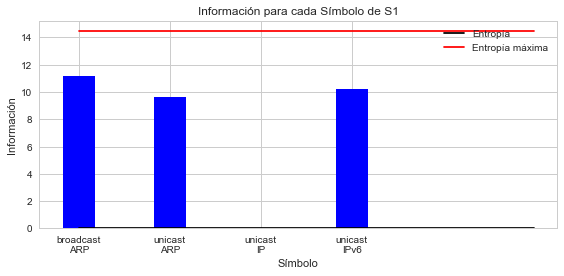

In [16]:
data_path = '../data/network_1/starbucks_juramento1.pcap'
sniffed_packets_b = sniff(offline=data_path)
S1_b = create_S1_source(sniffed_packets_b)
grafico_info_por_simbolo_s1(S1_b)

In [19]:
print('Entropia: {}'.format(entropy(S1_b)))
print('Entropia maxima: {}'.format(max_entropy(S1_b)))
informacion_por_simbolo(S1_b)

Entropia: 0.029008166856556238
Entropia maxima: 14.49416806599233


{'broadcast\nARP': 11.172239971104968,
 'unicast\nARP': 9.636187070864759,
 'unicast\nIP': 0.003630525708510118,
 'unicast\nIPv6': 10.246240552548745}

Para la red B podemos ver a primera vista que el simbolo `<unicast, IP>` tiene una cantidad de informacion extremadamente baja, tan solo 0.003 bits, en comparacion con los otros 3 simbolos que estan por encima de los 9 bits. En consecuencia el valor de la entropia de la fuente S1 para esta red es de 0.03 bits lo cual pareceria indicar que esta fuente es bastante predecible.

# Red C

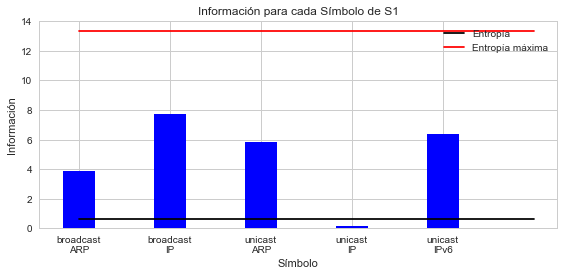

In [20]:
data_path = '../data/network_1/ethernet_capture.pcap'
sniffed_packets_3 = sniff(offline=data_path)
S1_c = create_S1_source(sniffed_packets_3)
grafico_info_por_simbolo_s1(S1_c)

In [21]:
print('Entropia: {}'.format(entropy(S1_c)))
print('Entropia maxima: {}'.format(max_entropy(S1_c)))
informacion_por_simbolo(S1_c)

Entropia: 0.6155405342412191
Entropia maxima: 13.36796070964157


{'broadcast\nARP': 3.8761076133118957,
 'broadcast\nIP': 7.753250865526361,
 'unicast\nARP': 5.852260871357529,
 'unicast\nIP': 0.15485648999966317,
 'unicast\nIPv6': 6.413764399254695}

Para la red C podemos ver que como antes el simbolo <unicast, IP> se distingue de entre los demas pues presenta una entropia muy baja, de tan solo 0.15 bits, mientras que para los otros simbolos de la red la entropia esta por encima de los 3 bits. Si bien la diferencia no es tan pronunciada como para la red B esta sigue siendo una red bastante predecible. 

# Red D

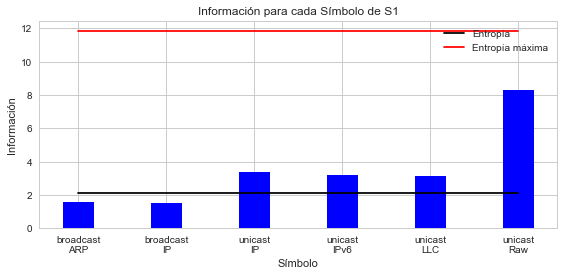

In [24]:
data_path = '../data/network_1/wired_lan.pcap'
sniffed_packets_4 = sniff(offline=data_path)
S1_d = create_S1_source(sniffed_packets_4)
grafico_info_por_simbolo_s1(S1_d)

In [25]:
print('Entropia: {}'.format(entropy(S1_d)))
print('Entropia maxima: {}'.format(max_entropy(S1_d)))
informacion_por_simbolo(S1_d)

Entropia: 2.1072477099022895
Entropia maxima: 11.8668925276766


{'broadcast\nARP': 1.6024499274499973,
 'broadcast\nIP': 1.5027578726685478,
 'unicast\nIP': 3.3790524938535484,
 'unicast\nIPv6': 3.223036337901875,
 'unicast\nLLC': 3.1664528095355076,
 'unicast\nRaw': 8.281930026955443}

Para la red D podemos ver que la entropia de la fuente es bastante elvada, aproximadamente 2.10 nats, esto parceria deberse en parte a una gran cantidad de trafico esta siendo utilizado para el control de la red.

Para las fuentes de las redes A y D presentan una entropia considerablemente mayor a las redes B y C. En ambas hay una gran parte del trafico destinado al control de la red 